In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
from src.config import PATHS

%matplotlib inline

In [3]:
data_file_path = PATHS.DATA_DIR / "sample_data.csv"

In [4]:
step_counter_readings = pd.read_csv(data_file_path)

<AxesSubplot: >

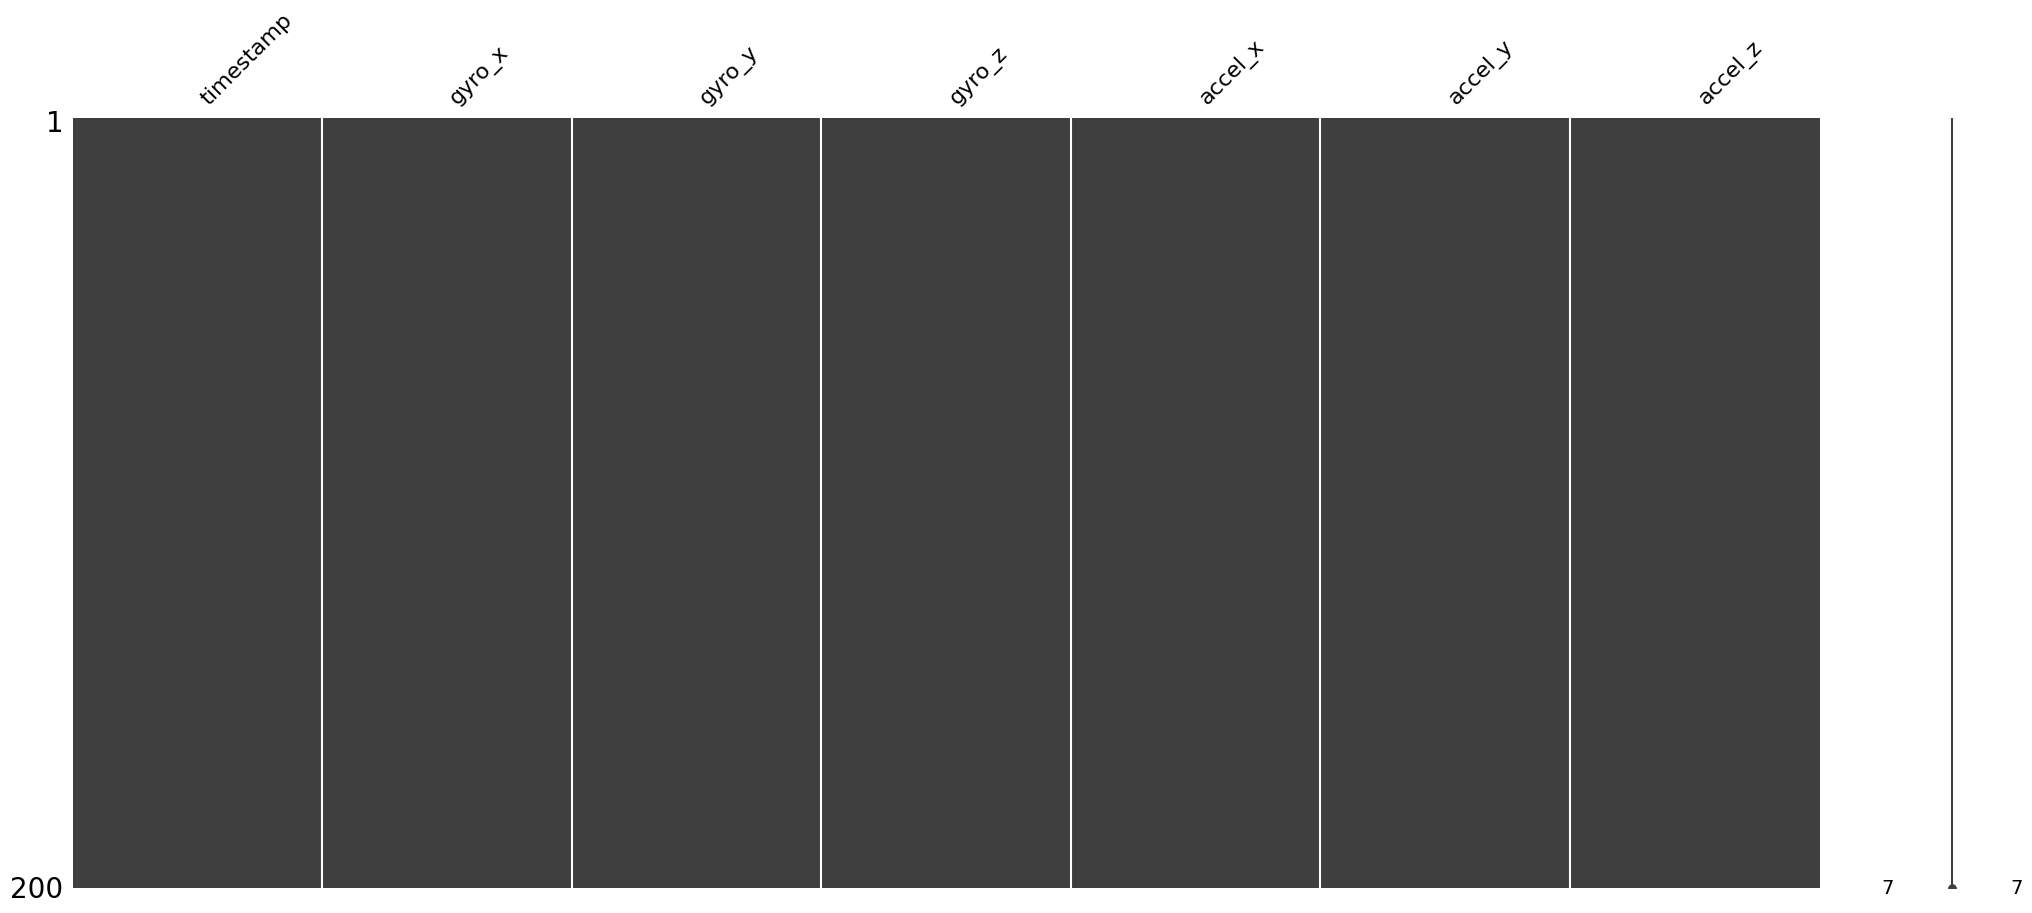

In [5]:
# visualise missing data 
msno.matrix(step_counter_readings)

In [6]:
step_counter_readings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  200 non-null    float64
 1   gyro_x     200 non-null    float64
 2   gyro_y     200 non-null    float64
 3   gyro_z     200 non-null    float64
 4   accel_x    200 non-null    float64
 5   accel_y    200 non-null    float64
 6   accel_z    200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [29]:
quantitative_vars = ['gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z']
cmap = sns.diverging_palette(0, 130, as_cmap=True)

mean_vals = (step_counter_readings[quantitative_vars]\
    .agg(["min", "max", "mean", "median"])\
    .transpose())

display(mean_vals.style.background_gradient(cmap, axis=0).format(precision=1))

,min,max,mean,median
gyro_x,-123.3,130.0,2.9,1.3
gyro_y,-139.4,156.7,-6.7,-10.2
gyro_z,-174.0,151.6,1.4,-0.4
accel_x,-146.6,142.9,4.1,6.0
accel_y,-156.9,135.8,-1.4,-3.7
accel_z,-111.5,122.2,1.2,-3.1


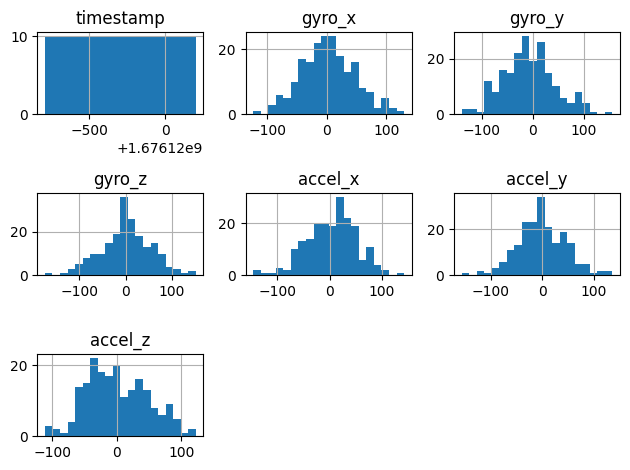

In [29]:
# quick and dirty plots 
step_counter_readings.hist(bins=20)
plt.tight_layout() 
plt.show() 

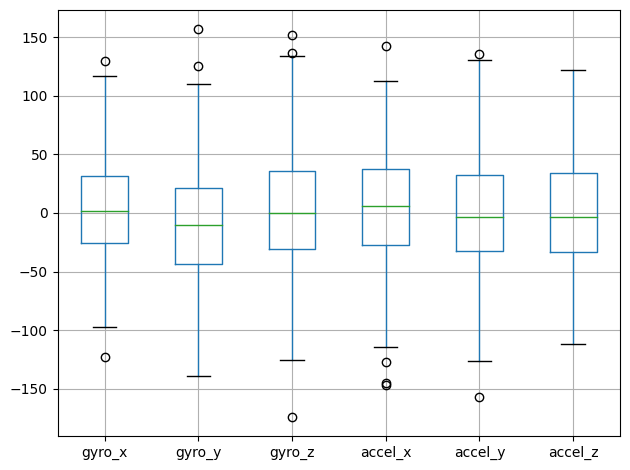

In [30]:
step_counter_readings[quantitative_vars].boxplot()
plt.tight_layout()
plt.show() 

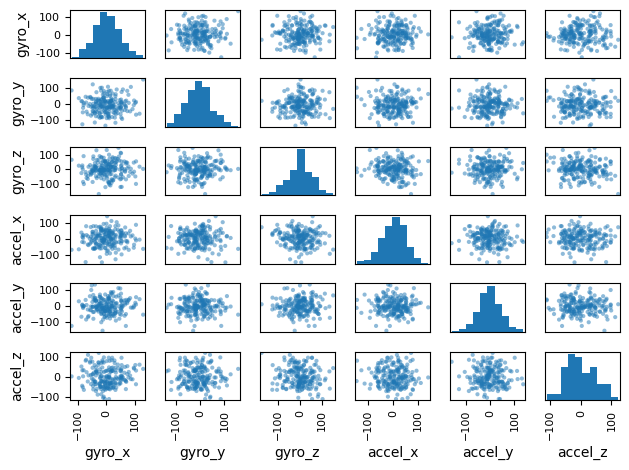

In [31]:
# pairwise correls 
pd.plotting.scatter_matrix(step_counter_readings[quantitative_vars])
plt.tight_layout() 
plt.show() 